In [ ]:
# Import libraries
import numpy as np                # For mathematical matrices computing
import matplotlib.pyplot as plt   # For mathematical plotting
from random import randint

In [ ]:
# Import methods from Keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
# Store data from URL
(train_set, train_target), (test_set, test_target) = fashion_mnist.load_data()

# Dataset sizes
print("Train set size:", train_set.shape)
print("Test set size:", test_set.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set size: (60000, 28, 28)
Test set size: (10000, 28, 28)


In [ ]:
# Define class names for dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# Rescale intensity
X_train, X_test = train_set[:60000]/255.0, test_set[:10000]/255.0

In [ ]:
# Targets
print("Train targets:\n", np.unique(train_target))
print("Test targets:\n", np.unique(test_target))

Train targets:
 [0 1 2 3 4 5 6 7 8 9]
Test targets:
 [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Name the numeric classes by using text file
class_dict = {}
counter = 0       # For indexing keys

# Add keys and references
for instances in class_names:
  class_dict.update({counter: instances})   # Add to dictionary
  counter+=1    # Update counter

In [ ]:
class_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Object: Sneaker


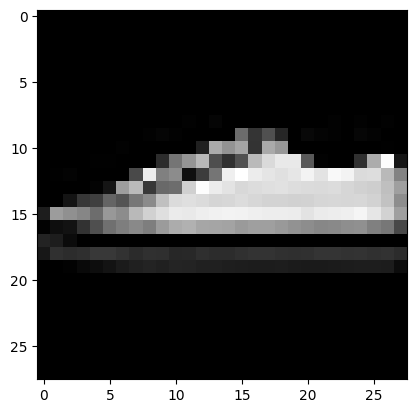

In [ ]:
# Display instance in training set
chosen_idx = randint(0, 50000)
chosen_img = train_set[chosen_idx]
chosen_target = int(train_target[chosen_idx])

# Display
print("Object:", class_dict[chosen_target])
plt.imshow(chosen_img, cmap='gray')
plt.show()

In [ ]:
# Encoding class
one_hot_train = to_categorical(train_target)
one_hot_test = to_categorical(test_target)

In [ ]:
# Create Sequential model
model_fashionmnist = Sequential()
model_fashionmnist.add(Flatten(input_shape=[28, 28]))
model_fashionmnist.add(Dense(300, activation="relu"))
model_fashionmnist.add(Dense(100, activation="relu"))
model_fashionmnist.add(Dense(10, activation="softmax"))

# Summarize
model_fashionmnist.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model and train
model_fashionmnist.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_hist = model_fashionmnist.fit(X_train, one_hot_train, epochs=30, batch_size=500)

# Test set evaluation
test_loss, test_acc = model_fashionmnist.evaluate(X_test, one_hot_test)
print('Test Loss:', test_loss)
print('Test Acc.:', test_acc)

Epoch 1/30
120/120 [==============================] - 5s 27ms/step - loss: 0.7381 - accuracy: 0.7374
Epoch 2/30
120/120 [==============================] - 3s 24ms/step - loss: 0.4774 - accuracy: 0.8266
Epoch 3/30
120/120 [==============================] - 2s 17ms/step - loss: 0.4117 - accuracy: 0.8493
Epoch 4/30
120/120 [==============================] - 2s 21ms/step - loss: 0.3769 - accuracy: 0.8602
Epoch 5/30
120/120 [==============================] - 4s 29ms/step - loss: 0.3488 - accuracy: 0.8701
Epoch 6/30
120/120 [==============================] - 3s 24ms/step - loss: 0.3316 - accuracy: 0.8774
Epoch 7/30
120/120 [==============================] - 2s 18ms/step - loss: 0.3118 - accuracy: 0.8839
Epoch 8/30
120/120 [==============================] - 2s 17ms/step - loss: 0.2993 - accuracy: 0.8878
Epoch 9/30
120/120 [==============================] - 2s 17ms/step - loss: 0.2867 - accuracy: 0.8940
Epoch 10/30
120/120 [==============================] - 3s 23ms/step - loss: 0.2768 - accura

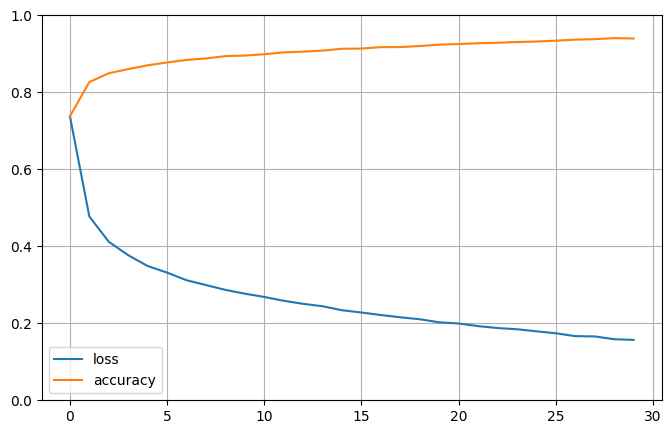

In [ ]:
import pandas as pd

# Model insights
pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# Save model
model_fashionmnist.save('/content/model_fashionmnist.h5') 

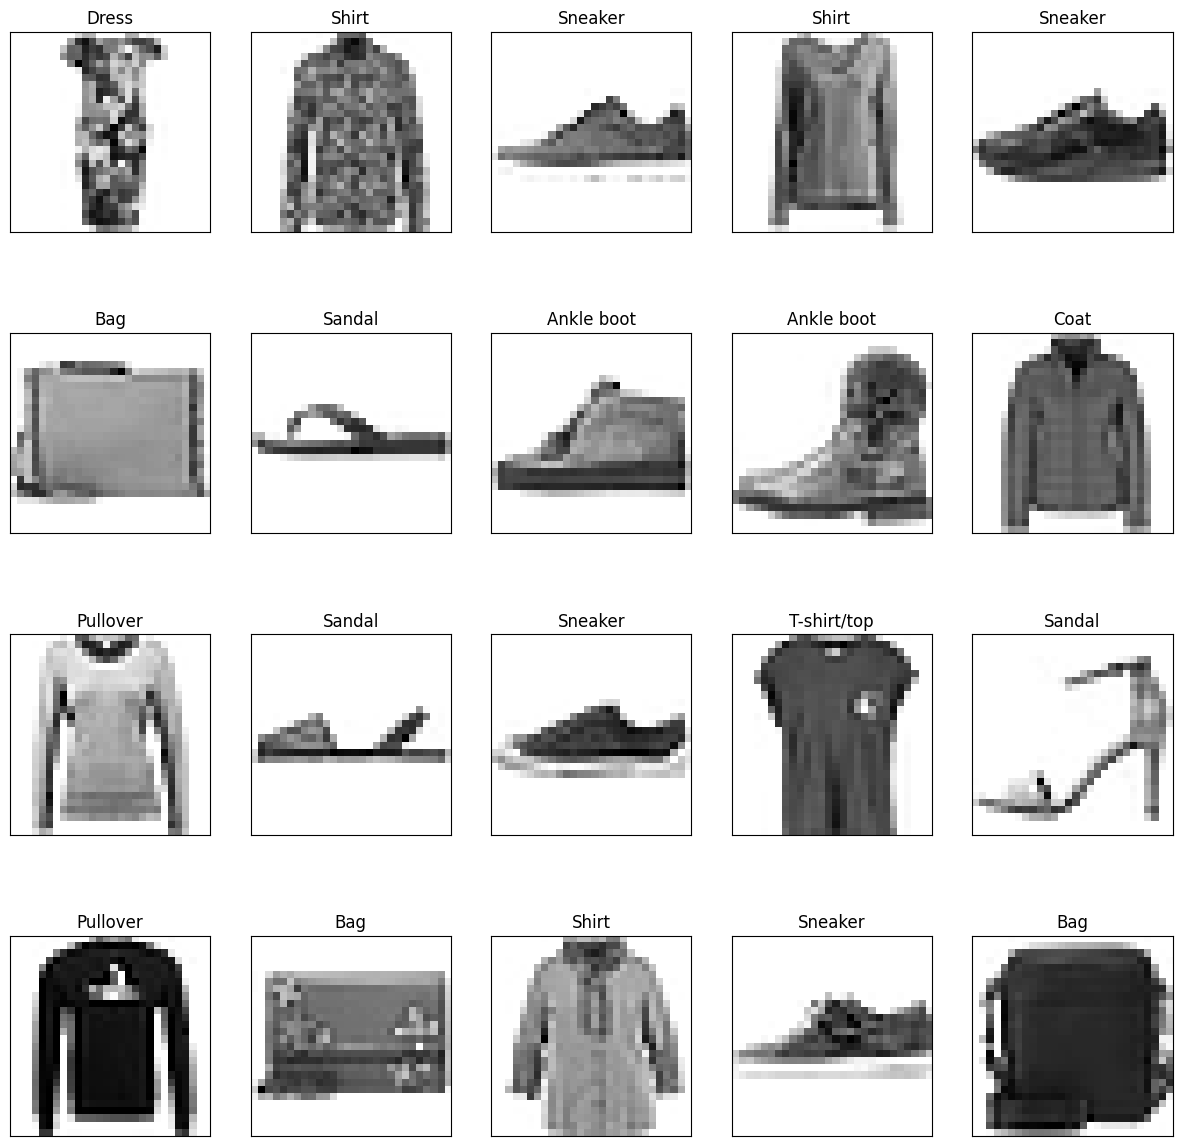

In [ ]:
# Test image
figure = plt.figure(figsize=[15, 15])

for indx in range(100, 120, 1):
  chosen_img  = X_test[indx].reshape(1, 28, 28)
  predict_num = np.argmax(model_fashionmnist.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(4, 5, (indx+1)-100)
  axes.imshow(chosen_img.reshape(28, 28), cmap='binary')
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_dict.keys():
    if predict_num == keys:
      plt.title(class_dict[keys])
      break
    else:
      continue

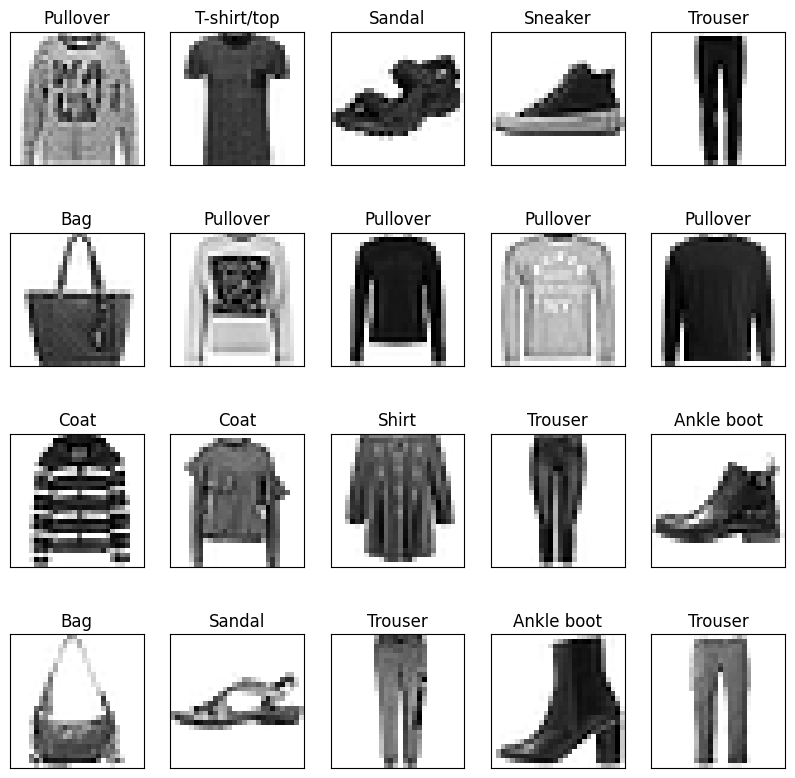

In [ ]:
# Test image
figure = plt.figure(figsize=[10, 10])

for indx in range(500, 520, 1):
  chosen_img  = X_test[indx].reshape(1, 28, 28)
  predict_num = np.argmax(model_fashionmnist.predict(chosen_img, verbose=False))   # Make prediction

  # Result and plot
  axes = figure.add_subplot(4, 5, (indx+1)-500)
  axes.imshow(chosen_img.reshape(28, 28), cmap='binary')
  axes.set_xticks([ ])
  axes.set_yticks([ ])

  # Check the true class
  for keys in class_dict.keys():
    if predict_num == keys:
      plt.title(class_dict[keys])
      break
    else:
      continue